Import the neccesary libraries

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,r2_score

Data Loading

In [101]:
df = pd.read_csv("insurance.csv")
print("Data loaded sucessfully")
print("First 5 rows of the data")
print(df.head())

Data loaded sucessfully
First 5 rows of the data
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Data Preprocessing and Feature Engineering

In [102]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

print("Number of rows before dropping")
print(len(df))

# Drop duplicated rows
df.drop_duplicates(inplace=True)

print("Number of rows after dropping")
print(len(df))

# Define the features (X) and the target variable (y)
X = df.drop("charges",axis=1) # Features are all columns except "charges"
y = df["charges"] # The target variable is "charges"

# Identify the types of features
categorical_features = ["sex","smoker","region"]
numerical_features = ["age","bmi","children"]

# Create a preprocessor using ColumnTransformer. This applies different transformations
# to different columns in a single step
preprocessor = ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical_features),
        ("cat",OneHotEncoder(),categorical_features)
    ]
)

Missing Values
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Duplicated Rows
1
Number of rows before dropping
1338
Number of rows after dropping
1337


Data Spilting

In [103]:
# We split the data into training and testing sets to evaluate the model's performance on the unseen data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Model Training

In [104]:
# We create a pipeline to cahin preprocessing and model training together for the linear model
linear_model_pipeline = Pipeline(steps=[("preprocessor",preprocessor),
                                        ("regressor",LinearRegression())])

# Train the model on the training data
linear_model_pipeline.fit(X_train,y_train)

# Make predictions on the test set
y_pred_linear = linear_model_pipeline.predict(X_test)

# Evaluate the linear model's performance using MAE and R-squared
mae_linear = mean_absolute_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)
print(mae_linear)
print(r2_linear)

4177.045561036324
0.8069287081198012


In [105]:
# Display model performance results
print("Linear Regression Model Performance:")
print("=" * 40)
print(f"Mean Absolute Error: ${mae_linear:,.2f}")
print(f"R-squared Score: {r2_linear:.4f}")
print(f"R-squared Percentage: {r2_linear*100:.2f}%")

# Interpretation
print("\nModel Interpretation:")
print("-" * 20)
if r2_linear > 0.8:
    print("✓ Excellent model performance!")
elif r2_linear > 0.6:
    print("✓ Good model performance")
elif r2_linear > 0.4:
    print("⚠ Moderate model performance")
else:
    print("⚠ Poor model performance - consider feature engineering or different algorithms")


Linear Regression Model Performance:
Mean Absolute Error: $4,177.05
R-squared Score: 0.8069
R-squared Percentage: 80.69%

Model Interpretation:
--------------------
✓ Excellent model performance!


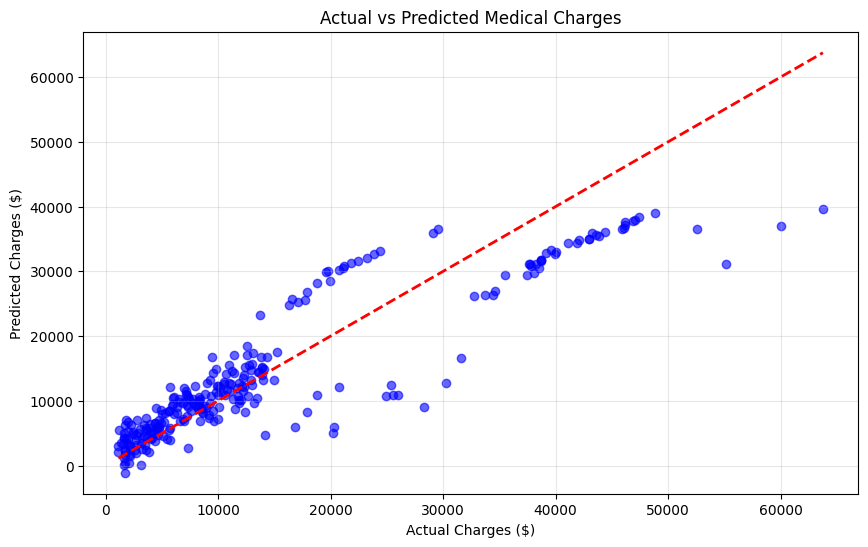


Residual Analysis:
Mean of residuals: $425.26
Standard deviation of residuals: $5,952.26

Feature Importance (Coefficients):
-----------------------------------
age                 :  3472.98
bmi                 :  1927.83
children            :   636.50
sex_female          :    50.77
sex_male            :   -50.77
smoker_no           : -11538.88
smoker_yes          : 11538.88
region_northeast    :   472.46
region_northwest    :    80.69
region_southeast    :  -366.46
region_southwest    :  -186.68


In [106]:
# Additional Analysis and Visualization
import matplotlib.pyplot as plt

# Create a comparison plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title('Actual vs Predicted Medical Charges')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and display residuals
residuals = y_test - y_pred_linear
print(f"\nResidual Analysis:")
print(f"Mean of residuals: ${residuals.mean():,.2f}")
print(f"Standard deviation of residuals: ${residuals.std():,.2f}")

# Feature importance (coefficients)
feature_names = numerical_features + list(linear_model_pipeline.named_steps['preprocessor']
                                        .transformers_[1][1].get_feature_names_out(categorical_features))
coefficients = linear_model_pipeline.named_steps['regressor'].coef_

print(f"\nFeature Importance (Coefficients):")
print("-" * 35)
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature:20}: {coef:8.2f}")


In [107]:
# Example Predictions
print("Example Predictions:")
print("=" * 50)

# Create some example cases
examples = [
    {"age": 30, "sex": "male", "bmi": 25.5, "children": 2, "smoker": "no", "region": "northeast"},
    {"age": 45, "sex": "female", "bmi": 32.0, "children": 0, "smoker": "yes", "region": "southwest"},
    {"age": 25, "sex": "female", "bmi": 22.0, "children": 1, "smoker": "no", "region": "northwest"}
]

for i, example in enumerate(examples, 1):
    # Convert to DataFrame for prediction
    example_df = pd.DataFrame([example])
    prediction = linear_model_pipeline.predict(example_df)[0]
    
    print(f"\nExample {i}:")
    print(f"  Age: {example['age']}, Sex: {example['sex']}, BMI: {example['bmi']}")
    print(f"  Children: {example['children']}, Smoker: {example['smoker']}, Region: {example['region']}")
    print(f"  Predicted Medical Charges: ${prediction:,.2f}")


Example Predictions:

Example 1:
  Age: 30, Sex: male, BMI: 25.5
  Children: 2, Smoker: no, Region: northeast
  Predicted Medical Charges: $5,445.03

Example 2:
  Age: 45, Sex: female, BMI: 32.0
  Children: 0, Smoker: yes, Region: southwest
  Predicted Medical Charges: $32,693.90

Example 3:
  Age: 25, Sex: female, BMI: 22.0
  Children: 1, Smoker: no, Region: northwest
  Predicted Medical Charges: $2,265.30
